<a href="https://colab.research.google.com/github/Aayush9-spec/Object_Detection/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

See the world through AI

Day 1: Setup & Image Detection

Goal:
Install and import Yolo (Ultralytics YOLOv8)
Set up YOLO and detect objects in a single image.
YOLO - YOU ONLY LOOK ONCE
Load pretrained model
Run inference on an image
Display results

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.3 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from google.colab import files

upload = files.upload()
file_name = list(upload.keys())[0]
print("Uploaded:", file_name)

Saving WhatsApp Image 2025-07-25 at 13.08.59.jpeg to WhatsApp Image 2025-07-25 at 13.08.59.jpeg
Uploaded: WhatsApp Image 2025-07-25 at 13.08.59.jpeg


In [ ]:
model = YOLO('yolov8n.pt')

In [ ]:
from typing import Annotated
results = model(file_name)
annotated = results[0].plot()



image 1/1 /content/WhatsApp Image 2025-07-25 at 13.08.59.jpeg: 512x640 3 persons, 73.8ms
Speed: 15.3ms preprocess, 73.8ms inference, 307.7ms postprocess per image at shape (1, 3, 512, 640)


(np.float64(-0.5), np.float64(4159.5), np.float64(3126.5), np.float64(-0.5))

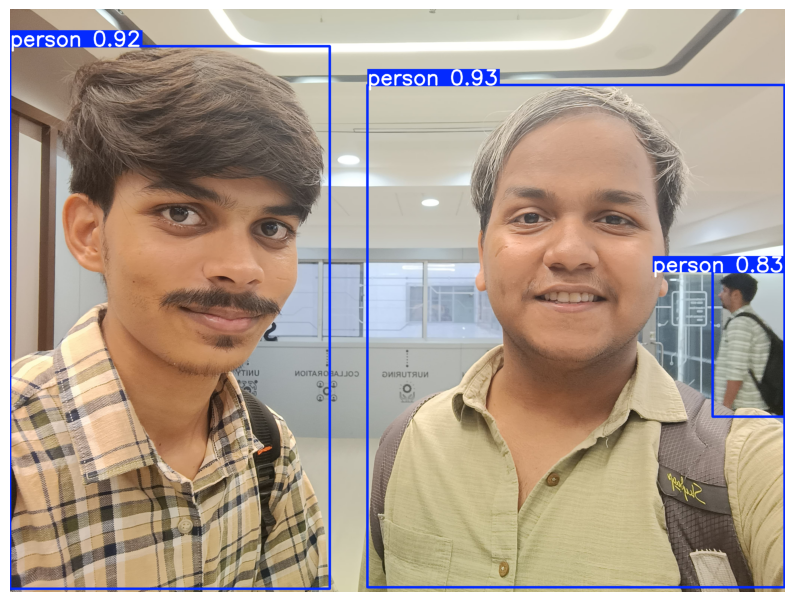

In [ ]:
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')

Day 2: Object Detection On Video

In [ ]:
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print("Uploaded:",video_path)

Saving Kota_prism.mp4 to Kota_prism.mp4
Uploaded: Kota_prism.mp4


In [ ]:
output_path = "output_detected.mp4"
cap=cv2.VideoCapture(video_path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS)or 25.0
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

frame_count =0
while True:
  ret, frame = cap.read()
  if not ret:
    break
  results = model(frame)
  annotated=results[0].plot()
  out.write(annotated)
  frame_count+=1
  if frame_count%100==0:
    print(f"Processed {frame_count} frames")
cap.release()
out.release()

print("Video Saved:",output_path)
files.download(output_path)



0: 640x384 (no detections), 47.3ms
Speed: 3.4ms preprocess, 47.3ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 8.1ms
Speed: 2.7ms preprocess, 8.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 8.5ms
Speed: 4.1ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 8.0ms
Speed: 3.0ms preprocess, 8.0ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 7.6ms
Speed: 3.9ms preprocess, 7.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 8.0ms
Speed: 3.1ms preprocess, 8.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 9.8ms
Speed: 2.9ms preprocess, 9.8ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 1 kite, 10.0ms
Speed: 3.1ms preprocess, 10.0ms inference, 2.2ms postprocess per image at shape (1, 3, 640

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Day 3:


In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from base64 import b64decode
from IPython import display as output # Import the display module
import google.colab # Import the google.colab module

model = YOLO('yolov8n.pt')

def take_photo(filename = 'snapshot.jpg'):
  js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);


      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();


      // Resize window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


      // Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);


      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
"""
  data = google.colab.output.eval_js(js) # Corrected eval_js
  with open(filename, 'wb') as f:
    f.write(b64decode(data))
  return filename

filename = take_photo('snapshot.jpg')
print("Captured:", filename)

results = model(filename)
annotated = results[0].plot()

plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
